In [28]:
# importando a biblioteca e os dados.
import pandas as pd
dados_originais = pd.read_csv('clients_data.csv')
dados_originais.tail()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1995,2668,2029-06-18,700,2323,4865.08,Web,CA,18.5,17
1996,1147,2029-06-19,2637,1281,1115.04,Tablet,BR,70.6,66
1997,7420,2029-06-20,3312,79,4029.99,Tablet,UK,49.6,104
1998,1365,2029-06-21,1388,2114,300.79,Tablet,UK,59.8,5
1999,5531,2029-06-22,3684,1415,4606.60,Mobile,US,68.9,123


# Eliminando clientes inativos
nessa etapa vamos criar um filtro para elimitar clientes inativos, de acordo com a regra de negócio clientes inativos são clientes que os acessos foram feitos antes do ano de 2025

In [29]:
df_clientes_ativos = dados_originais[dados_originais['date'] > '2024-12-31']
df_clientes_ativos = df_clientes_ativos.sort_values(by='date')
df_clientes_ativos.head(5)

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
366,2150,2025-01-01,3063,149,603.92,Web,BR,73.5,4
367,8560,2025-01-02,1831,1504,353.95,Web,JP,31.3,23
368,2931,2025-01-03,2641,96,2422.91,Mobile,CA,48.0,29
369,2664,2025-01-04,2746,1721,1108.25,Mobile,UK,11.4,98
370,2081,2025-01-05,4008,2240,1277.38,Web,BR,46.5,149


In [30]:
# possuímos atualmente 1634 clientes ativos cadastrados!
df_clientes_ativos['client_id'].count()

np.int64(1634)

# Agrupando clientes por plataforma
como nossa análise vai ser segmentada, vamos separar os clientes por grupos de dispositivos. ['Web', 'Mobile', 'Tablet'].

In [31]:
df_tablet = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Tablet']
df_tablet['client_id'].count()

np.int64(549)

In [32]:
df_mobile = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Mobile']
df_mobile['client_id'].count()

np.int64(579)

In [33]:
df_web = df_clientes_ativos[df_clientes_ativos['platform_type'] == 'Web']
df_web['client_id'].count()

np.int64(506)

# Eliminando outliers
É de suma importancia eliminar dados que ''fogem da realidade'', então vamos isolar alguns casos no qual chamamos de outliers, já que será feita uma análise estatística esse tipo de dado pode interferir nos resultados finais.

Método utilizado: IQR - Uso do intervalo interquartil
é uma medida estatística que descreve a dispersão dos dados, ou seja, a distância entre o primeiro quartil (Q1) e o terceiro quartil (Q3) de um conjunto de dados
IQR=Q3−Q1


In [27]:
pd.set_option('display.width', 1000)  # Um valor bem alto evita a quebra de colunas

Vamos usar a coluna lucro para retirar dados dos clientes que lucram muito acima do normal ou muito abaixo.

In [76]:
# Tablets

q1_tablet = df_tablet['revenue'].quantile(0.25)
q3_tablet = df_tablet['revenue'].quantile(0.75)
iqr_tablet = q3_tablet - q1_tablet

tablet_limite_inferior = q1_tablet - 1.5 * iqr_tablet
tablet_limite_superior = q1_tablet + 1.5 * iqr_tablet

df_tablet_sem_outliers = df_tablet[(df_tablet['revenue'] >= tablet_limite_inferior) & (df_tablet['revenue'] <= tablet_limite_superior)]
df_tablet_sem_outliers = df_tablet_sem_outliers.sort_values(by='revenue', ascending=False)
df_tablet_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1368,9707,2027-09-30,2823,54,4997.34,Tablet,BR,78.0,88
455,4766,2025-03-31,2504,1368,4995.26,Tablet,BR,35.8,126
564,2353,2025-07-18,4407,1667,4991.61,Tablet,UK,62.3,32
488,6161,2025-05-03,1193,995,4991.02,Tablet,CA,79.5,114
567,8575,2025-07-21,3501,1651,4973.93,Tablet,DE,10.7,96


## Clientes com alta rejeição
Vamos trabalhar com os clientes que possuem uma taxa de rejeiçäo alta, vamos filtrar aqueles nos quais 65% do público deixou a plataforma sem exercer ou interagir com nenhum tipo de conversão.

In [77]:
df_tablet_sem_outliers = df_tablet_sem_outliers[(df_tablet_sem_outliers['bounce_rate'] > 65)]
df_tablet_sem_outliers = df_tablet_sem_outliers.sort_values(by='bounce_rate', ascending=False)
df_tablet_sem_outliers.head()

,client_id,date,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1012,4310,2026-10-09,2055,807,1195.42,Tablet,JP,79.8,42
1948,3355,2029-05-02,1255,223,390.75,Tablet,US,79.8,19
488,6161,2025-05-03,1193,995,4991.02,Tablet,CA,79.5,114
969,1966,2026-08-27,2238,1610,2910.79,Tablet,FR,79.4,63
1137,2252,2027-02-11,208,1600,533.13,Tablet,DE,79.4,61


In [78]:
df_tablet_sem_outliers['client_id'].count()

np.int64(104)

In [79]:
print(df_tablet_sem_outliers.to_string())

      client_id        date  sessions  active_users  revenue platform_type country  bounce_rate  page_views
1012       4310  2026-10-09      2055           807  1195.42        Tablet      JP         79.8          42
1948       3355  2029-05-02      1255           223   390.75        Tablet      US         79.8          19
488        6161  2025-05-03      1193           995  4991.02        Tablet      CA         79.5         114
969        1966  2026-08-27      2238          1610  2910.79        Tablet      FR         79.4          63
1137       2252  2027-02-11       208          1600   533.13        Tablet      DE         79.4          61
1651       5114  2028-07-09      3819          1879  4290.24        Tablet      DE         79.2          42
1755       2100  2028-10-21      4238           679  1622.74        Tablet      US         79.1          64
644        5858  2025-10-06      1916           492  2571.17        Tablet      DE         79.0          36
1176       1390  2027-03-22 

## Agrupando por região
vamos agrupar os dados por região e as demais colunas vamos preencher com a moda, mas antes vamos remover a coluna data e client_id pois elas não serão mais úteis nessa etapa em específico daqui para frente.

In [80]:
df_tablet_sem_outliers_limpa = df_tablet_sem_outliers.drop(columns=['date' , 'client_id'])

In [83]:
df_tablet_sem_outliers_limpa.head(5)

,sessions,active_users,revenue,platform_type,country,bounce_rate,page_views
1012,2055,807,1195.42,Tablet,JP,79.8,42
1948,1255,223,390.75,Tablet,US,79.8,19
488,1193,995,4991.02,Tablet,CA,79.5,114
969,2238,1610,2910.79,Tablet,FR,79.4,63
1137,208,1600,533.13,Tablet,DE,79.4,61


In [ ]:
# Agrupando os dados por região
# Agrupa por 'Região' e aplica funções específicas por coluna
resultado = df.groupby('Região').agg({
    'Vendas': 'sum',      # Soma total das vendas por região
    'Lucro': 'mean',      # Média do lucro por região
    'Produto': lambda x: x.mode()[0]  # Moda do produto (mais frequente)
})

print(resultado)

In [95]:
tablet_agrupado = df_tablet_sem_outliers_limpa.groupby('country').agg({
    'sessions': lambda x: round(x.sum(), 2),           
    'active_users': lambda x: round(x.mean(), 1),      
    'revenue': lambda x: round(x.sum(), 2),            
    'bounce_rate': lambda x: round(x.mode()[0], 1),    
    'page_views': lambda x: round(x.mean(), 0)         
})

In [97]:
tablet_agrupado

,sessions,active_users,revenue,bounce_rate,page_views
country,,,,,
BR,20055,1149.3,28678.86,66.3,64.0
CA,31640,1015.0,30522.09,66.8,81.0
DE,40516,1301.2,39400.08,66.1,76.0
FR,34105,1244.9,32882.08,65.7,86.0
JP,53249,1397.5,40827.60,75.2,88.0
UK,49205,1248.5,37794.81,66.0,51.0
US,44478,1047.6,48222.44,67.2,93.0


# Trablet: Gráficos de performance regional 

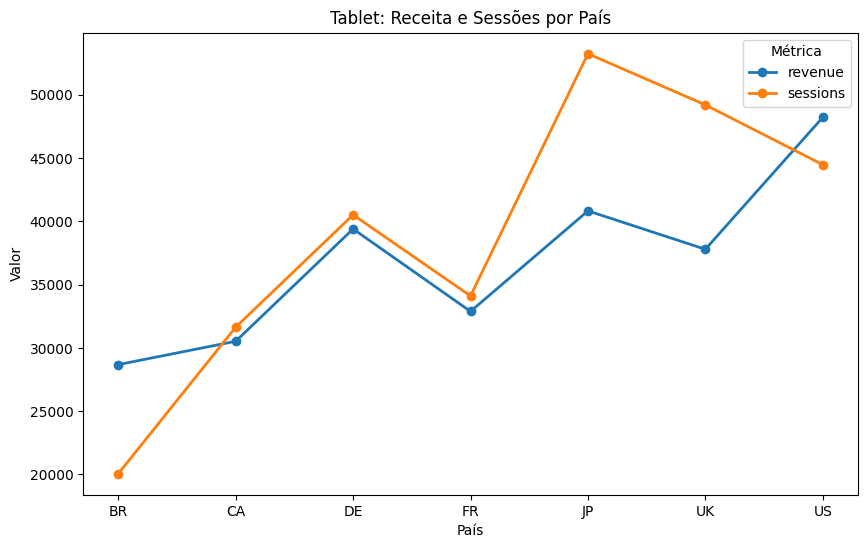

In [106]:
import matplotlib.pyplot as plt  # Correção na importação

# Resetar o índice para transformar 'country' em coluna novamente
tablet_agrupado_reset = tablet_agrupado.reset_index()

# Agora sim podemos usar 'country' no eixo x
tablet_agrupado_reset.plot(
    x='country', 
    y=['revenue', 'sessions'], 
    kind='line', 
    marker='o',
    figsize=(10, 6),
    linewidth=2
)

plt.title('Tablet: Receita e Sessões por País')
plt.xlabel('País')
plt.ylabel('Valor')
# plt.grid(True)
plt.legend(title='Métrica')
plt.show()